In [1]:
%matplotlib inline

from functools import partial
from pathlib import Path 


import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
import matplotlib.colors as mcolors
import matplotlib.cm as mcm

from mpl_toolkits.axisartist.axislines import AxesZero


import papercolors as pc
from papercolors import colordict as pcd

paper_path = Path('../figures/tex/')

fs={'normal': 10, 'small':9, 'footnote':8, 'script':7, 'tiny':5, 'heading':12}


In [2]:
packages = "\n".join( 
    [r"\usepackage{inputenc}", 
     r"\usepackage[T1]{fontenc}",
     r"\usepackage{cmbright}",
     r'\usepackage{{amsmath}}',
     r'\usepackage{{amssymb}}',
     r'\usepackage{{latexsym}}',
    ])
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = packages
mpl.rc('font', family='serif', serif="Times New Roman")
mpl.rcParams['figure.dpi']=200
mpl.rc("pgf", texsystem = "pdflatex", preamble = packages)

In [28]:
def bar(xy, width, height): # make partial so always create a new function
    return mpatches.Rectangle(xy, width, height, ec = pcd['section'], fc=(pcd['section'], .4), lw=.5)

In [168]:
b1y1 = .825
b2y2 = .05
x1 = 0.02
b1x1 = .775

bw = .05
gap = bw/2

data = [2, 4, 6]

scale_height = lambda x : x

def bar_identity(di):
    return di*.025

def bar_scaled(di): 
    return (di**2)*.004

def bar_unknown(di):
    return di*.025

# action(data) to viz, viz
def scale(di):
    return np.array(di)*.5

In [169]:
bar_transforms =  {"identity": {'function': bar_identity, 'symmetry':'HE'}, 
                   "exponent": {'function': bar_scaled, 'symmetry':'H'}, 
                   "unknown" :{'function':bar_unknown, 'symmetry':'E'}}

In [170]:
# data to vis
boxes_data = {bt : {di: {'xy': (b1x1 + (bw+gap)*i, b1y1), 'width': bw, 'height': btd['function'](di)} for i, di in enumerate(data)} for bt, btd in bar_transforms.items()}

In [171]:
boxes_data

{'identity': {2: {'xy': (0.775, 0.825), 'width': 0.05, 'height': 0.05},
  4: {'xy': (0.8500000000000001, 0.825), 'width': 0.05, 'height': 0.1},
  6: {'xy': (0.925, 0.825), 'width': 0.05, 'height': 0.15000000000000002}},
 'exponent': {2: {'xy': (0.775, 0.825), 'width': 0.05, 'height': 0.016},
  4: {'xy': (0.8500000000000001, 0.825), 'width': 0.05, 'height': 0.064},
  6: {'xy': (0.925, 0.825), 'width': 0.05, 'height': 0.14400000000000002}},
 'unknown': {2: {'xy': (0.775, 0.825), 'width': 0.05, 'height': 0.05},
  4: {'xy': (0.8500000000000001, 0.825), 'width': 0.05, 'height': 0.1},
  6: {'xy': (0.925, 0.825), 'width': 0.05, 'height': 0.15000000000000002}}}

In [172]:
boxes_max = {}
boxes_scale = {}
for bt, btd in bar_transforms.items():
    boxes_scale[bt] = {'data':{}, 'vis':{}}
    boxes_max[bt] = {'data':{}, 'vis':{}}
    for i, (di, boxes) in enumerate(zip(data, boxes_data[bt].values())):
        boxes_scale[bt]['data'][di] = {'xy': (b1x1 + (bw+gap)*i, b2y2), 'width':bw, 'height': btd['function'](scale(di))}
        boxes_scale[bt]['vis'][di] = {'xy': (b1x1 + (bw+gap)*i, b2y2), 'width':bw, 'height': scale(bar(**boxes_data[bt][di]).get_height())}
        
    boxes_max[bt]['data']['max'] = {'xy':(b1x1 + bw + gap, b2y2), 'width': bw, 'height': btd['function'](max(data))}
    boxes_max[bt]['vis']['max'] =  {'xy':(b1x1 + bw + gap, b2y2), 'width': bw, 'height': max(bar(**ba).get_height() for ba in boxes_data[bt].values())}

In [173]:
boxes_max['identity'], boxes_scale['identity']

({'data': {'max': {'xy': (0.8500000000000001, 0.05),
    'width': 0.05,
    'height': 0.15000000000000002}},
  'vis': {'max': {'xy': (0.8500000000000001, 0.05),
    'width': 0.05,
    'height': 0.15000000000000002}}},
 {'data': {2: {'xy': (0.775, 0.05), 'width': 0.05, 'height': 0.025},
   4: {'xy': (0.8500000000000001, 0.05), 'width': 0.05, 'height': 0.05},
   6: {'xy': (0.925, 0.05), 'width': 0.05, 'height': 0.07500000000000001}},
  'vis': {2: {'xy': (0.775, 0.05), 'width': 0.05, 'height': 0.025},
   4: {'xy': (0.8500000000000001, 0.05), 'width': 0.05, 'height': 0.05},
   6: {'xy': (0.925, 0.05), 'width': 0.05, 'height': 0.07500000000000001}}})

In [174]:
for name in bar_transforms:
    for boxes_dict in [boxes_max[name], boxes_scale[name]]:
        scale_v = [bar(**boxes_dict['vis'][key]).get_height() for key in boxes_dict['vis']]
        scale_d = [bar(**boxes_dict['data'][key]).get_height() for key in boxes_dict['data']]
        print(f"{name}, vis={scale_v}, data={scale_d}")

identity, vis=[0.15000000000000002], data=[0.15000000000000002]
identity, vis=[0.025, 0.05, 0.07500000000000001], data=[0.025, 0.05, 0.07500000000000001]
exponent, vis=[0.14400000000000002], data=[0.14400000000000002]
exponent, vis=[0.008, 0.032, 0.07200000000000001], data=[0.004, 0.016, 0.036000000000000004]
unknown, vis=[0.15000000000000002], data=[0.15000000000000002]
unknown, vis=[0.025, 0.05, 0.07500000000000001], data=[0.025, 0.05, 0.07500000000000001]


In [200]:
def make_diagram(title, symmetry, action, action_label, boxes, boxes_func, savepath, action_label_orientation='v'):
    
    fig, axd = plt.subplot_mosaic([[name for name in bar_transforms]], figsize=(3.5, 1.25), layout='compressed')
    
    fig.suptitle(title, fontsize=fs['script'], color=pcd['fiber'])
    
    for fname, fdict  in bar_transforms.items():
        ax = axd[fname]
    
        boxes_data = []
        for di in data:
            boxes_data.append(box_data:=bar(**boxes[fname][di]))
            ax.add_patch(box_data)

        boxes_viz = []
        for key in boxes_func[fname]['vis']:
            ax.add_patch(box_viz:=bar(**boxes_func[fname]['vis'][key]))
            box_viz.set_facecolor(box_data.get_facecolor()) #I think some alpha blending is messing up the inital color
            boxes_viz.append(box_viz)
      
        if symmetry in fdict["symmetry"]:
            sym = "YES"
            color = "darkgreen"
            hdx = boxes_data[0]
        else:
            sym = "NO"
            color = "darkred"
            for box_viz in boxes_viz:
                box_viz.set_y(box_viz.get_y() + gap*6)

            boxes_data_func = []
            for key in boxes_func[fname]['data']:
                ax.add_patch(box_data_func:=bar(**boxes_func[fname]['data'][key]))
                box_data_func.set_x(box_data_func.get_x()-gap*4)
                boxes_data_func.append(box_data_func)
            
           
            ax.text(b1x1+4*gap, b2y2+.015, r"$\textbf{?}$", ha='center', va='bottom', fontsize=fs['footnote'])
            hdx = boxes_data_func[0]
    

        
        ax.text(.5, -.05, f"{fname}: {sym}", transform=ax.transAxes, va='top', ha='center', color=color, fontsize=fs['tiny'])
        ax.spines[:].set_color(color)
        ax.set(xticks=[], yticks=[], xlim=(0,1), ylim=(0,1), aspect='equal')
    
        # data side
        xy = ax.text(x1, b1y1, f"{",".join([str(i) for i in data])}", ha='left', va='bottom', fontsize=fs['tiny'], color=pcd['section'])
        
        ad = action(data)
        text = f"{ad}" if isinstance(ad, int) else f"{ad[0]:.0f},{ad[1]:.0f},{ad[2]:.0f}"
        
        xley = ax.annotate(text, xy=(0,0), xytext=(.5, b2y2), textcoords=(xy, 'data'), ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['section'])
    
       # arrows: annotate: tail, head, tail=text, xy=head
        arrdd = ax.annotate(f"", (.475, 1), (.475,0), xycoords=(xy, xley) , textcoords= xy, arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['fiber'])) 
        arrbb = ax.annotate(f"", (.475, 1), (.475,0), xycoords = boxes_viz[int(len(boxes_viz)//2)], textcoords = boxes_data[1], arrowprops=dict(arrowstyle="->,widthA=.15, lengthA=0", color=pcd['fiber'])) 

        for arrows in [arrdd, arrbb]:
            if action_label_orientation == 'v':
                andd = ax.annotate(action_label, xy=(0,0), xytext=(.25, .5), textcoords=arrows, fontsize=fs['tiny'], color=pcd['fiber'], ha='right', va='center', rotation=90)
            else:
                andd = ax.annotate(action_label, xy=(0,0), xytext=(.75, .5), textcoords=arrows, fontsize=fs['tiny'], color=pcd['fiber'], ha='left', va='center')
        
        for tail, head in [ (xy, (boxes_data[0], xy)), (xley, (hdx, xley), )]  :
            a = ax.annotate("", (0, .5), (1, .5), xycoords=head, textcoords=tail,  arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['artist']))
            lab = r"$data \mapsto \Box$"
            ax.annotate(lab, xy=(0,0), xytext =(.5, .85), textcoords=a, ha='center', va='bottom', color=pcd['artist'],  fontsize=fs['tiny'])
        
    
    fig.savefig(savepath, bbox_inches='tight', dpi=200)

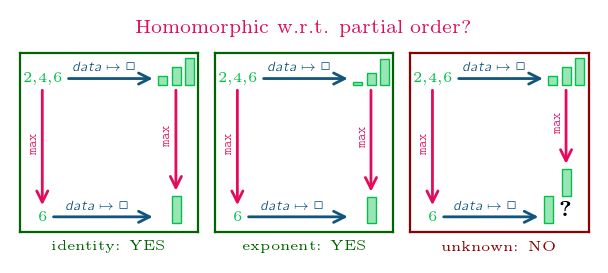

In [201]:
title = "Homomorphic w.r.t. partial order?"
symmetry = "H"
savepath = paper_path/"homomorphism.png"
boxes_func = boxes_max
action = max
action_label = r"$\texttt{max}$"

make_diagram(title, symmetry, action, action_label, boxes_data, boxes_func, savepath, action_label_orientation='v')


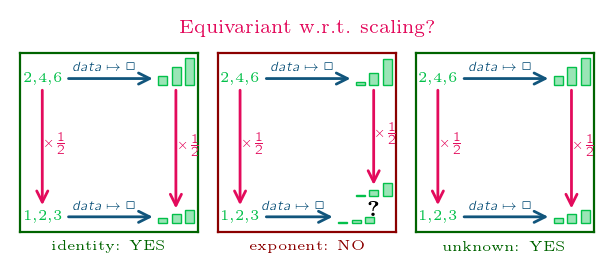

In [202]:
title = "Equivariant w.r.t. scaling?"
symmetry = "E"
savepath = paper_path/"quivariant.png"
boxes_func = boxes_scale
action =  scale
action_label = r"$\times\frac{1}{2}$"

make_diagram(title, symmetry, action, action_label, boxes_data, boxes_func, savepath, action_label_orientation ='h')


In [ ]:
# must regenerate object 

b1x1 = .75

sd = [di*.5 for di in data]
boxes = {'correct':  {di: bar((b1x1 + (bw+gap)*i, b1y1), bw, di*.025) for i, di in enumerate(data)}, 
         'incorrect': {di: bar((b1x1 + (bw+gap)*i, b1y1), bw, barh_(di)*.004) for i, di in enumerate(data)},
         'invariant': {di: bar((b1x1 + (bw+gap)*i, b1y1), bw, dx*.025) for i, (di, dx) in enumerate(zip(data, np.roll(data, 1)))}}


boxes_scale = {k : { di: bar((b.get_xy()[0], b2y2 + (gap*6 if k=='incorrect' else 0)), b.get_width(), b.get_height()*.5) for di, b in v.items()} for k, v in boxes.items()} 

boxes_incorrect ={di: bar((b1x1 + (bw+gap)*i-gap*9, b2y2), bw, barh_(di)*.004) for i, di in enumerate(sd)}

fig, axd = plt.subplot_mosaic([['correct', 'incorrect', 'invariant'], ], figsize=(3.5, 1.25), layout='compressed')

for name, ax in axd.items():
    ax.set(xticks=[], yticks=[], xlim=(0,1), ylim=(0,1), aspect='equal')
    

    xy = ax.text(x1, b1y1, f"{",".join([str(i) for i in data])}", ha='left', va='bottom', fontsize=fs['tiny'], color=pcd['section'])
    xley = ax.annotate("{:.0f},{:.0f},{:.0f}".format(*sd), xy=(0,0), xytext=(.5, b2y2), textcoords=(xy, 'data'), ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['section'])
    
    # arrows: annotate: tail, head, tail=text, xy=head
    
    f1 = ax.annotate(f"", (.475, 1), (.475,0), xycoords=(xy, xley) , textcoords= xy, arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['fiber'])) 
    ml = ax.annotate(r"$\times\frac{1}{2}$", xy=(0,0), xytext=(.75, .5), textcoords=f1, fontsize=fs['tiny'], color=pcd['fiber'], ha='left', va='center')
    

    for di in data:
        ax.add_patch(boxes[name][di])
        ax.add_patch(boxes_scale[name][di])


    f1 = ax.annotate(f"", (.475, 1), (.475,0), xycoords= boxes_scale[name][4], textcoords = boxes[name][4], arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['fiber'])) 
    ml = ax.annotate(r"$\times\frac{1}{2}$", xy=(0,0), xytext=(.75, .5), textcoords=f1, fontsize=fs['tiny'], color=pcd['fiber'], ha='left', va='center')

    
    hdx = boxes_scale[name][2]
    
    if name == 'incorrect':
        for d, b in boxes_incorrect.items():
            ax.add_patch(b)
        hdx = boxes_incorrect[1]
        ax.text(b1x1+4*gap, b2y2-.02, r"$\textbf{?}$", ha='center', va='bottom', fontsize=fs['footnote'])
    
    for i,(tail, head) in enumerate([(xy, (boxes[name][2], xy)), (xley, (hdx, xley), )]):
        a = ax.annotate("", (0, .5), (1, .5), xycoords=head, textcoords=tail,  arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['artist']))
        match name:
            case 'correct':
                lab = r"$\texttt{bar}_: x \mapsto \Box$"
            case 'invariant':
                lab = r"$\texttt{wbar}: x \mapsto \Box$"
            case 'incorrect':
                lab = r"$\texttt{sbar}: x \mapsto \Box$" 
        ax.annotate(lab, xy=(0,0), xytext =(.5, .85), textcoords=a, ha='center', va='bottom', color=pcd['artist'],  fontsize=fs['tiny'])

axd['correct'].spines[:].set_color('darkgreen')
axd['incorrect'].spines[:].set_color('darkred')
axd['invariant'].spines[:].set_color('orange')

fig.suptitle("Equivariant w.r.t. scaling?", fontsize=fs['script'], color=pcd['fiber'])
axd['correct'].text(.5, -.05, "bar: YES", transform=axd['correct'].transAxes, va='top', ha='center', color='darkgreen', fontsize=fs['tiny'],)
axd['incorrect'].text(.5, -.05, "sbar: NO", transform=axd['incorrect'].transAxes, va='top', ha='center', fontsize=fs['tiny'], color='darkred')
axd['invariant'].text(.5, -.05, "wbar: YES", transform=axd['invariant'].transAxes, va='top', ha='center', fontsize=fs['tiny'], color='orange')
fig.savefig(paper_path/"equivariant.png", bbox_inches='tight')
